In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from dynascale.utils.ca import plot
from dynascale.challenges.ca import CAChallenge
from dynascale.baselines.cnn import CNN
from dynascale.baselines.basic import Basic
from dynascale.tasks import FixedTrainSize
import numpy as np
import scipy as sp

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

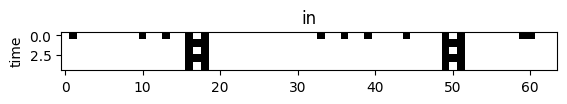

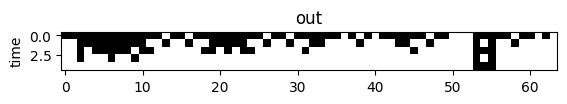

In [9]:
latent_dim = 2
embed_dim = 64
n = 50
timesteps = 5
challenge = CAChallenge(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
y0 = challenge.make_init_conds(30, in_dist=False)
x = challenge.make_data(x0, timesteps=timesteps)
y = challenge.make_data(y0, timesteps=timesteps)
plot([x, y], labels=["in", "out"])

In [12]:
model = CNN(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=100)

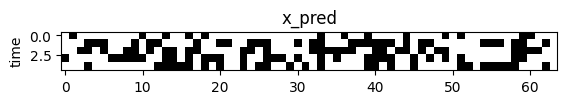

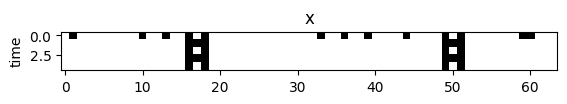

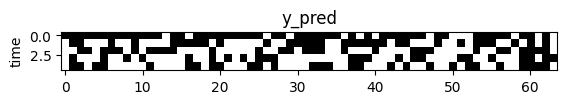

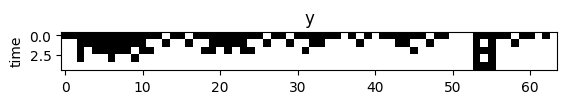

In [13]:
x_pred = model.predict(x[:, 0], 5)
y_pred = model.predict(y[:, 0], 5)
plot([x_pred, x, y_pred, y], labels=["x_pred", "x", "y_pred", "y"])

In [17]:
task = FixedTrainSize(n=500, L=[2], E=[64], T=[5], max_control_cost_per_dim=0, control_horizons=1, test_examples=10, reps=1,
                      test_timesteps=5, challenge_cls=CAChallenge)
basic_data = task.evaluate(model_cls=Basic, fit_kwargs={"epochs": 100})
cnn_data = task.evaluate(model_cls=CNN, fit_kwargs={"epochs": 100})

AttributeError: 'FixedTrainSize' object has no attribute 'evaluate'